In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv("bank-additional.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,18,student,single,unknown,no,no,no,cellular,sep,thu,...,1,3,1,success,-3.4,92.379,-29.8,0.809,5017.5,yes
1,18,student,single,unknown,no,yes,no,cellular,may,thu,...,1,7,2,success,-1.8,93.876,-40.0,0.677,5008.7,no
2,18,student,single,unknown,no,yes,yes,telephone,aug,wed,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.900,4991.6,no
3,19,student,single,high.school,unknown,yes,no,cellular,may,tue,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.344,5099.1,no
4,20,blue-collar,single,high.school,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.shape

(4119, 21)

In [8]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
# Identify feature types 
cat_cols = df.select_dtypes(include='object').columns
num_cols = df.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

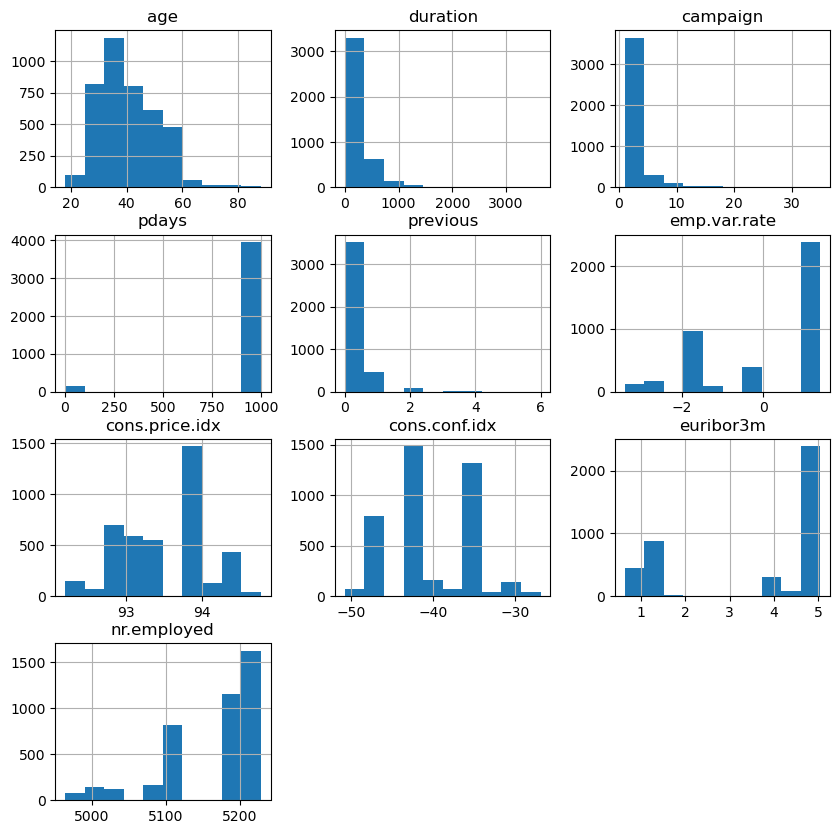

In [12]:
df.hist(figsize=(10,10))
plt.show()

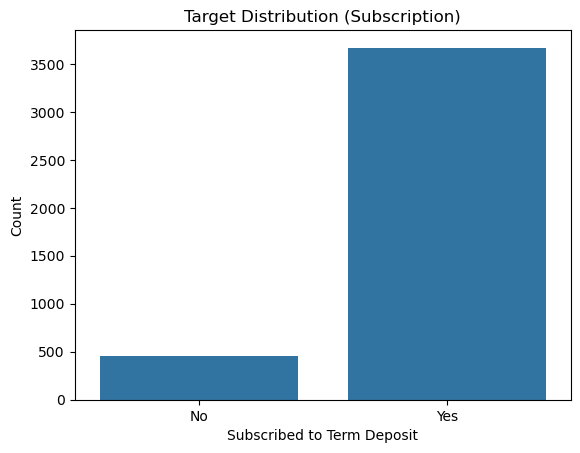

In [13]:
# Target variable distribution
sns.countplot(data=df, x='y')
plt.title("Target Distribution (Subscription)")
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()

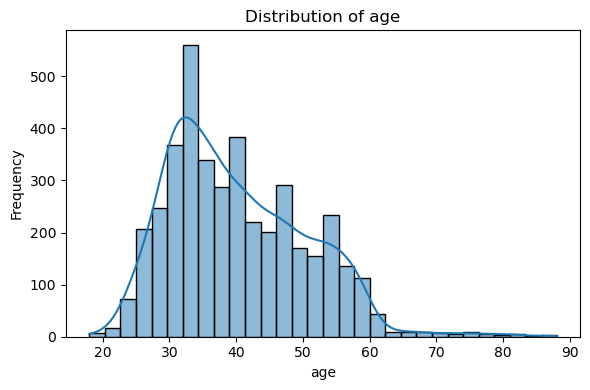

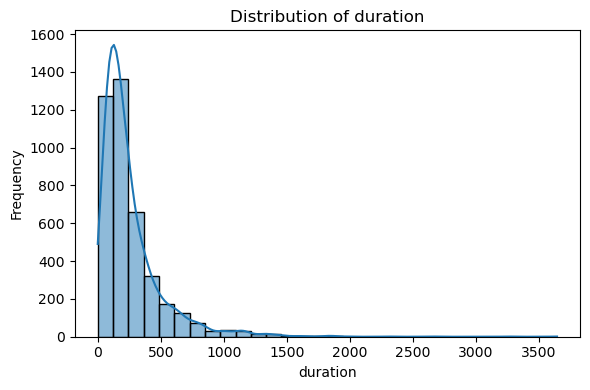

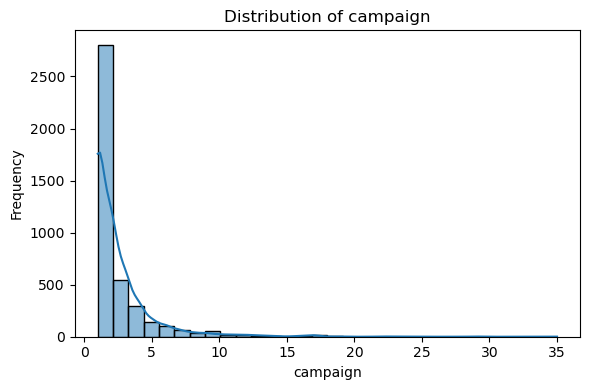

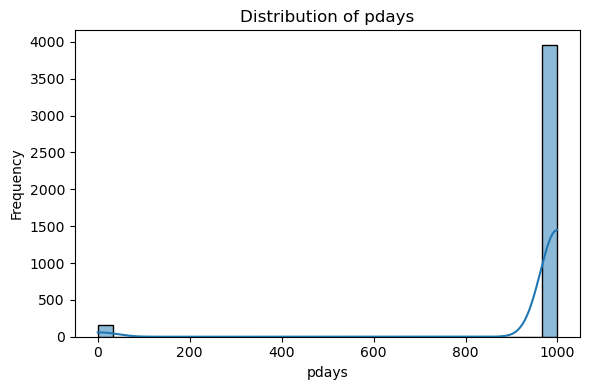

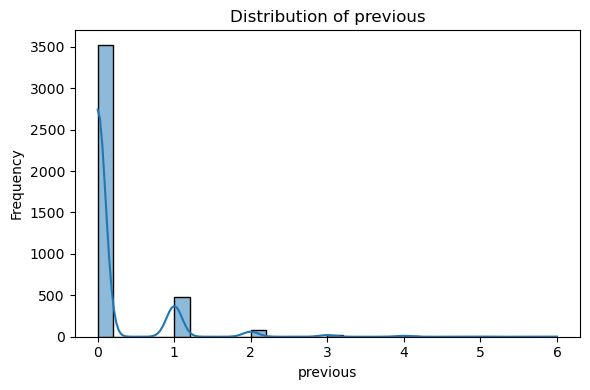

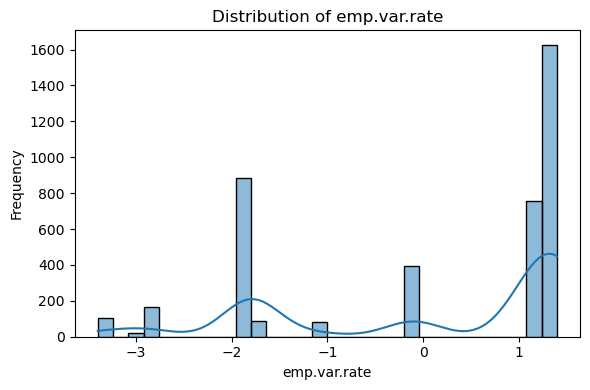

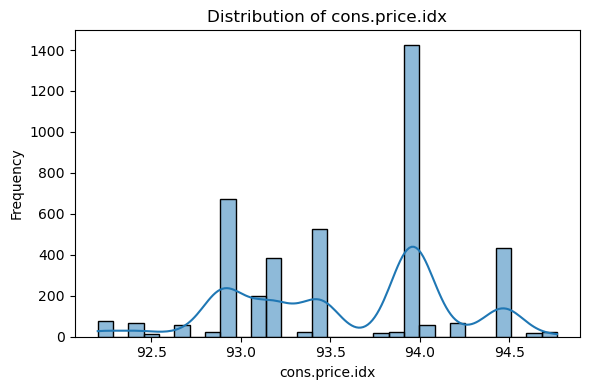

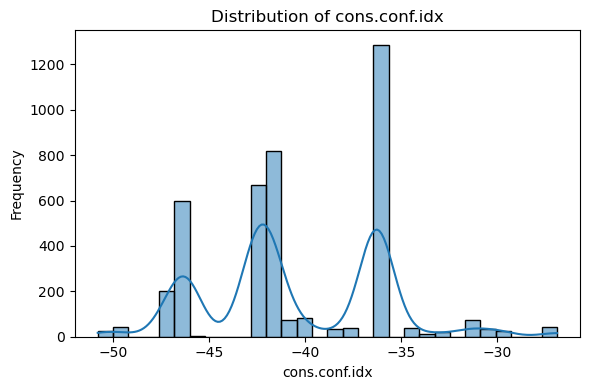

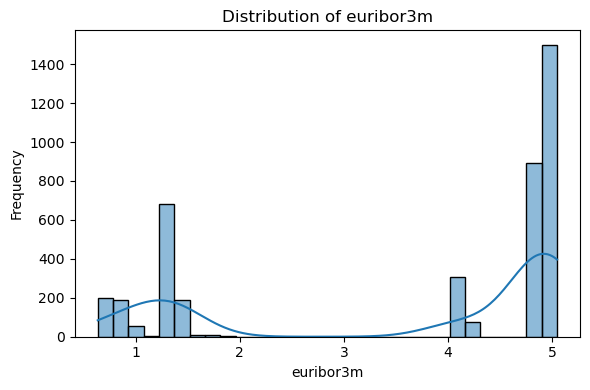

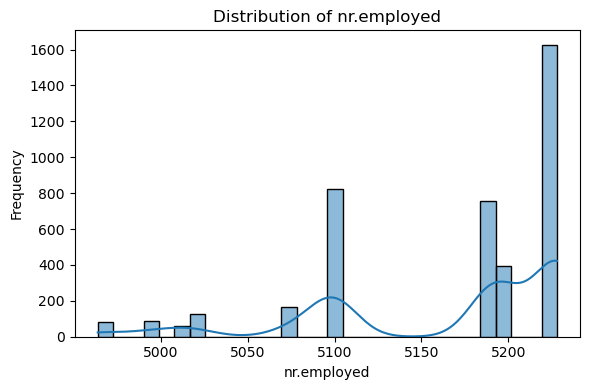

In [15]:
#  Numerical feature distributions
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


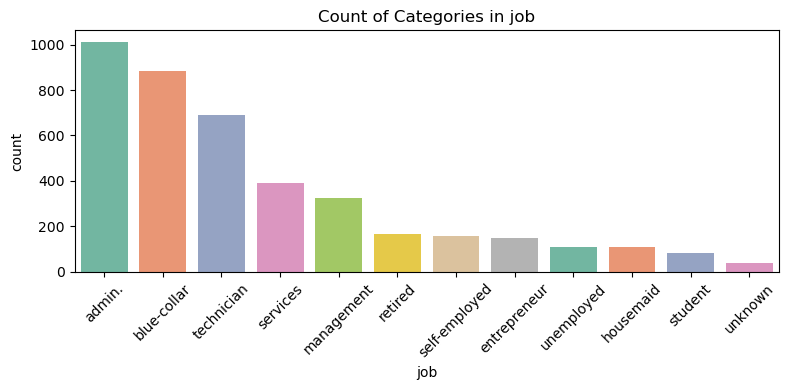

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


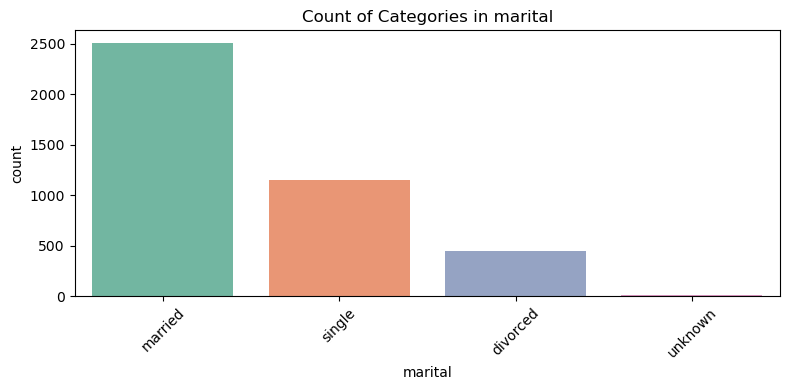

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


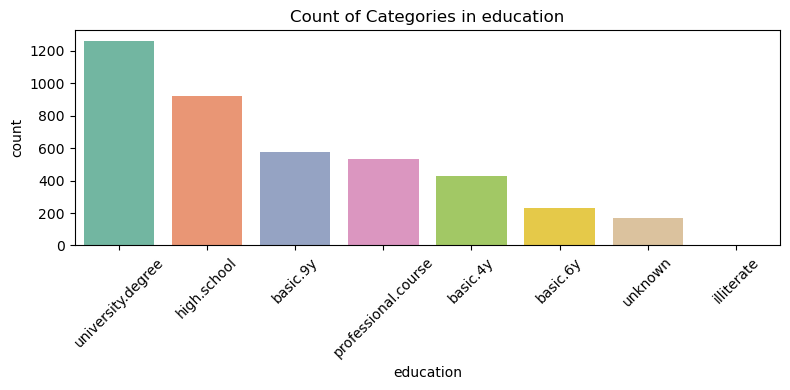

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


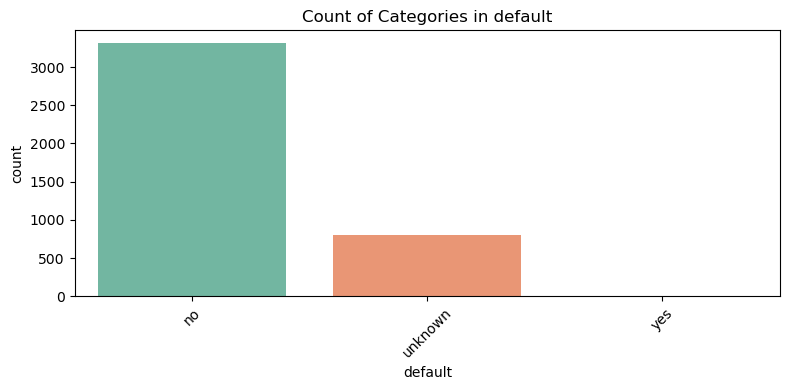

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


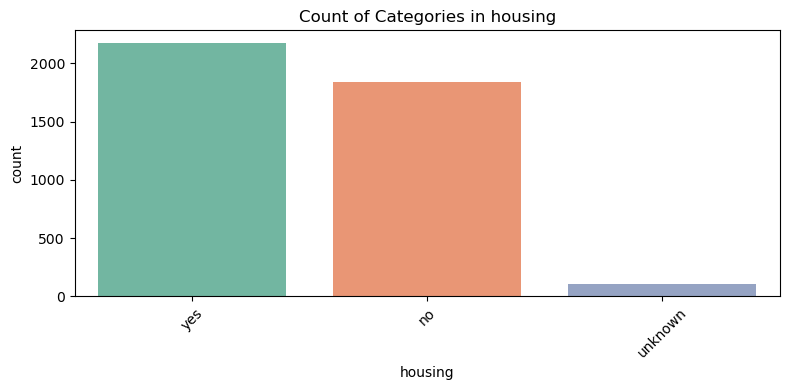

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


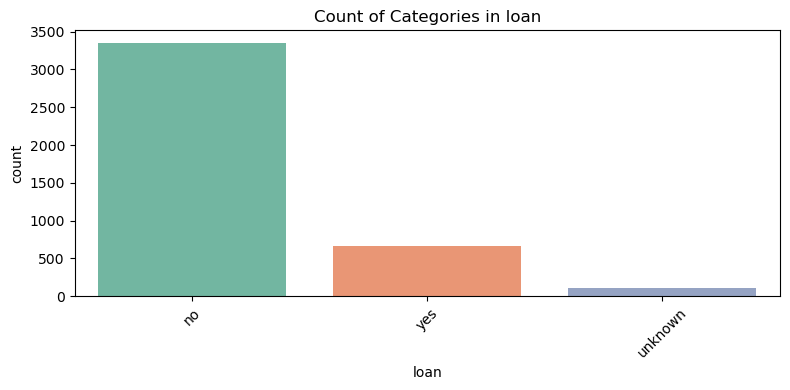

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


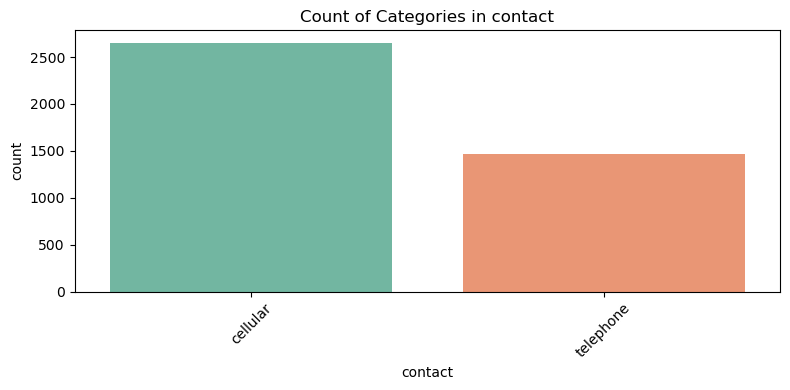

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


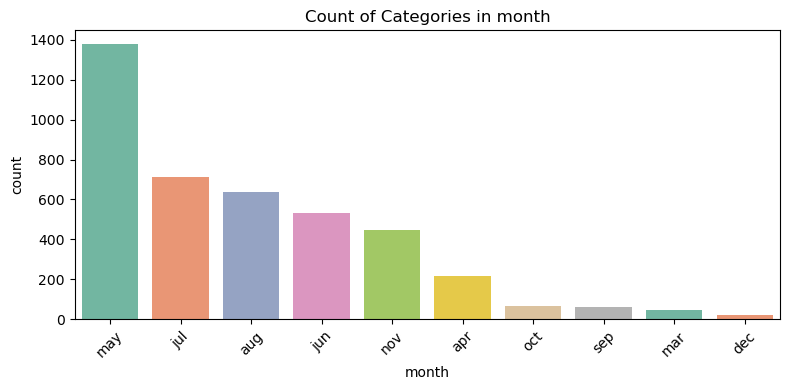

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


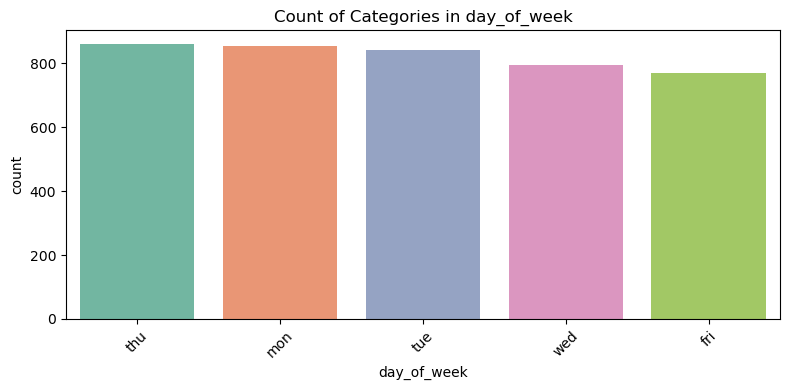

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


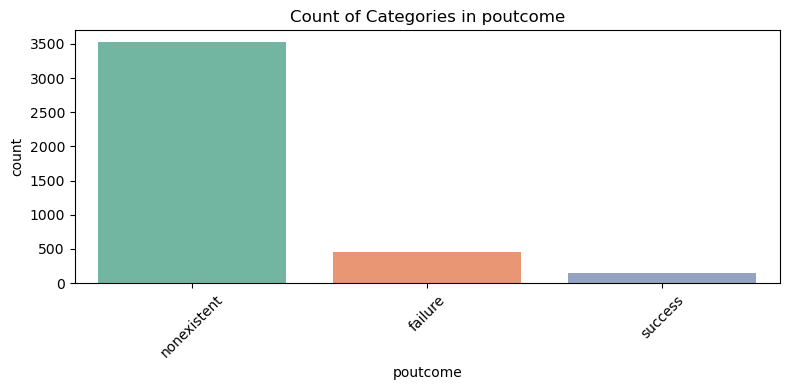

C:\Users\MY DELL\AppData\Local\Temp\ipykernel_15036\1905387557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')


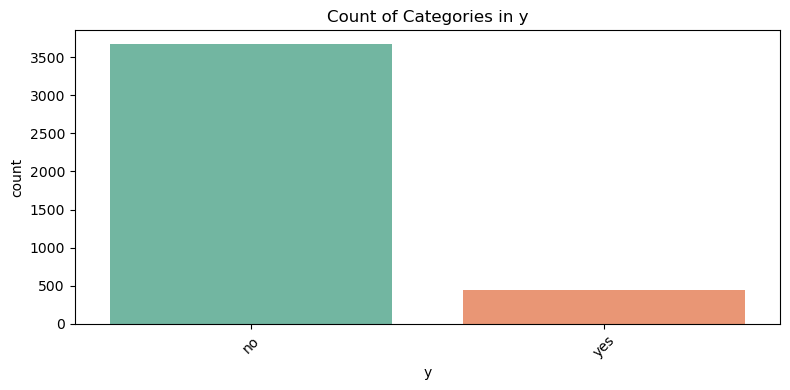

In [17]:
#  Categorical feature counts
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f"Count of Categories in {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

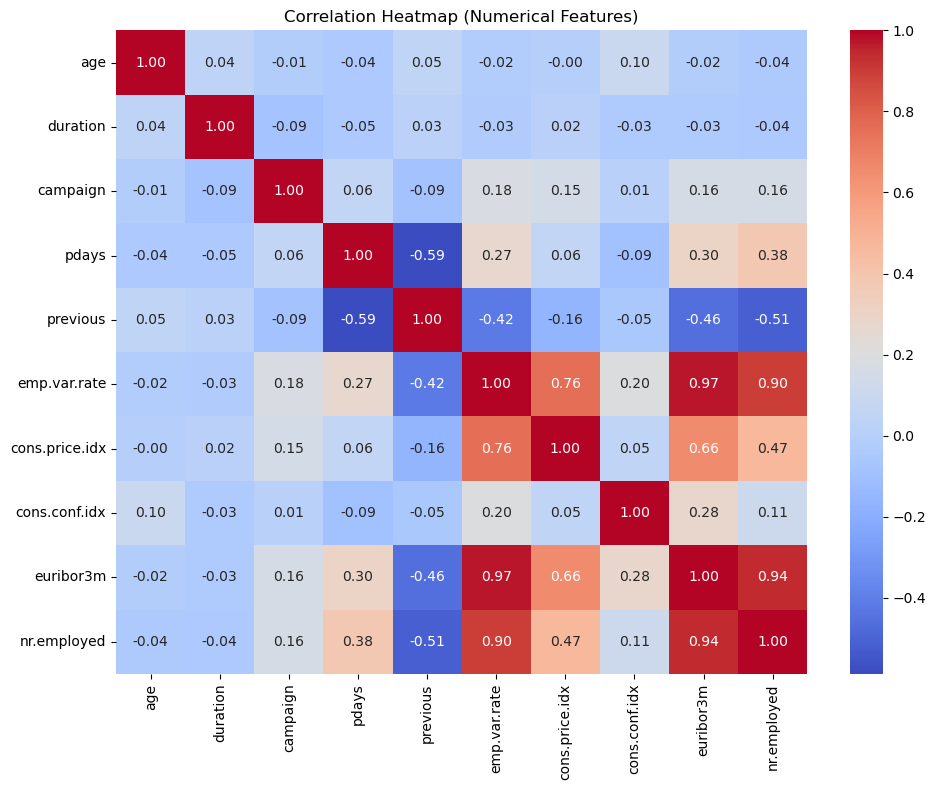

In [19]:
#  Correlation heatmap (only numerical)
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols ].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()

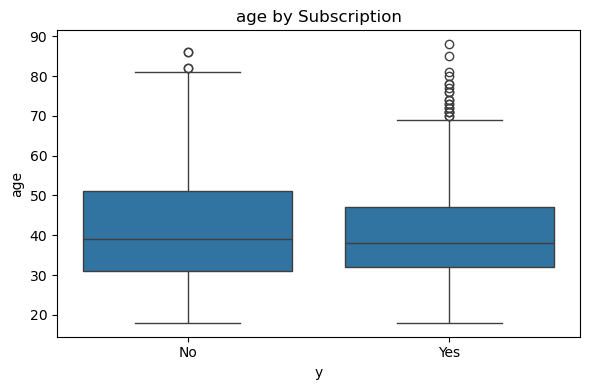

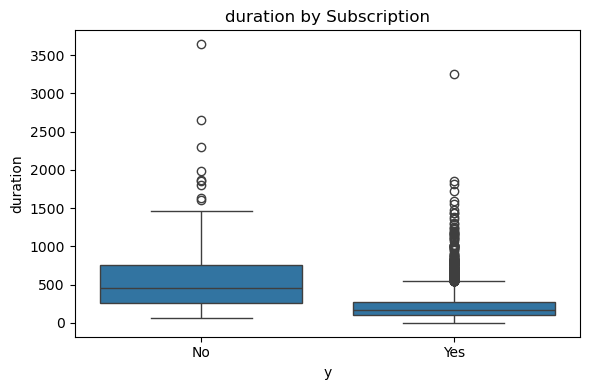

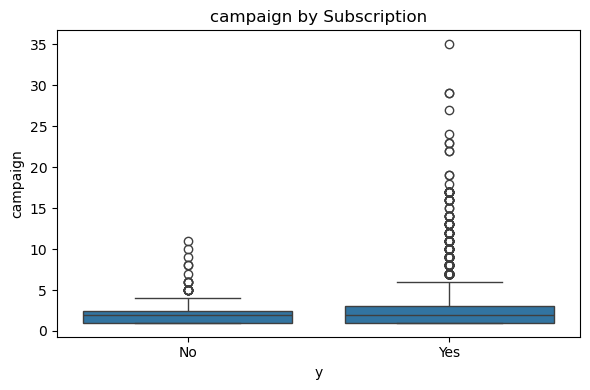

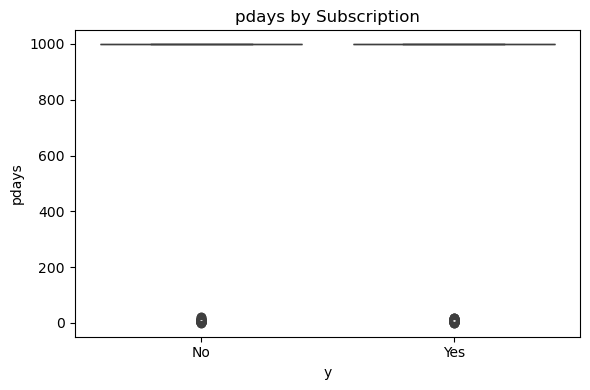

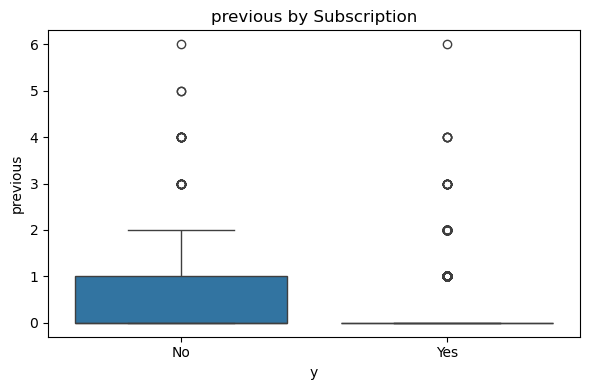

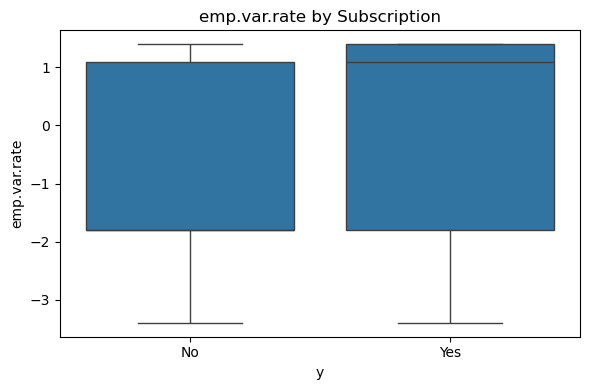

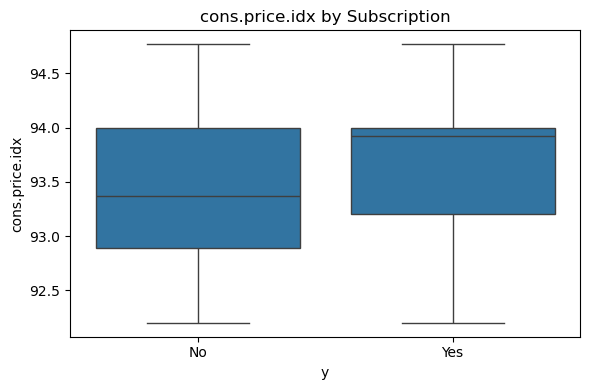

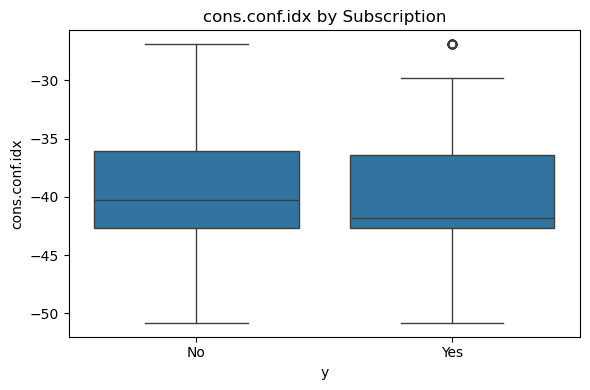

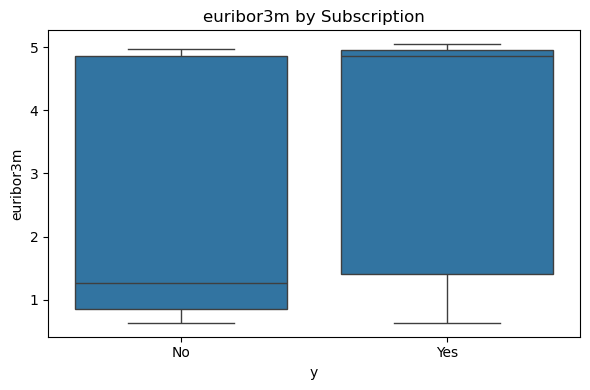

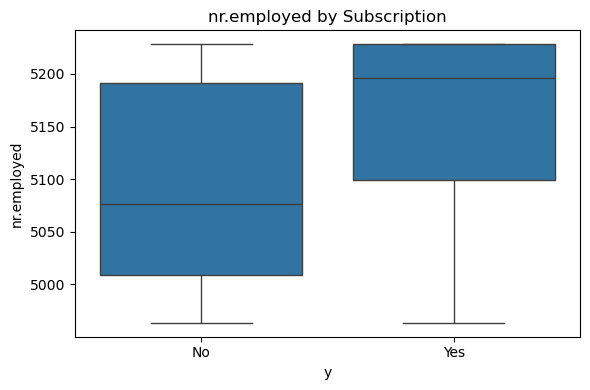

In [21]:
# 5. Boxplots of numerical features by target
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='y', y=col)
    plt.title(f"{col} by Subscription")
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.tight_layout()
    plt.show()

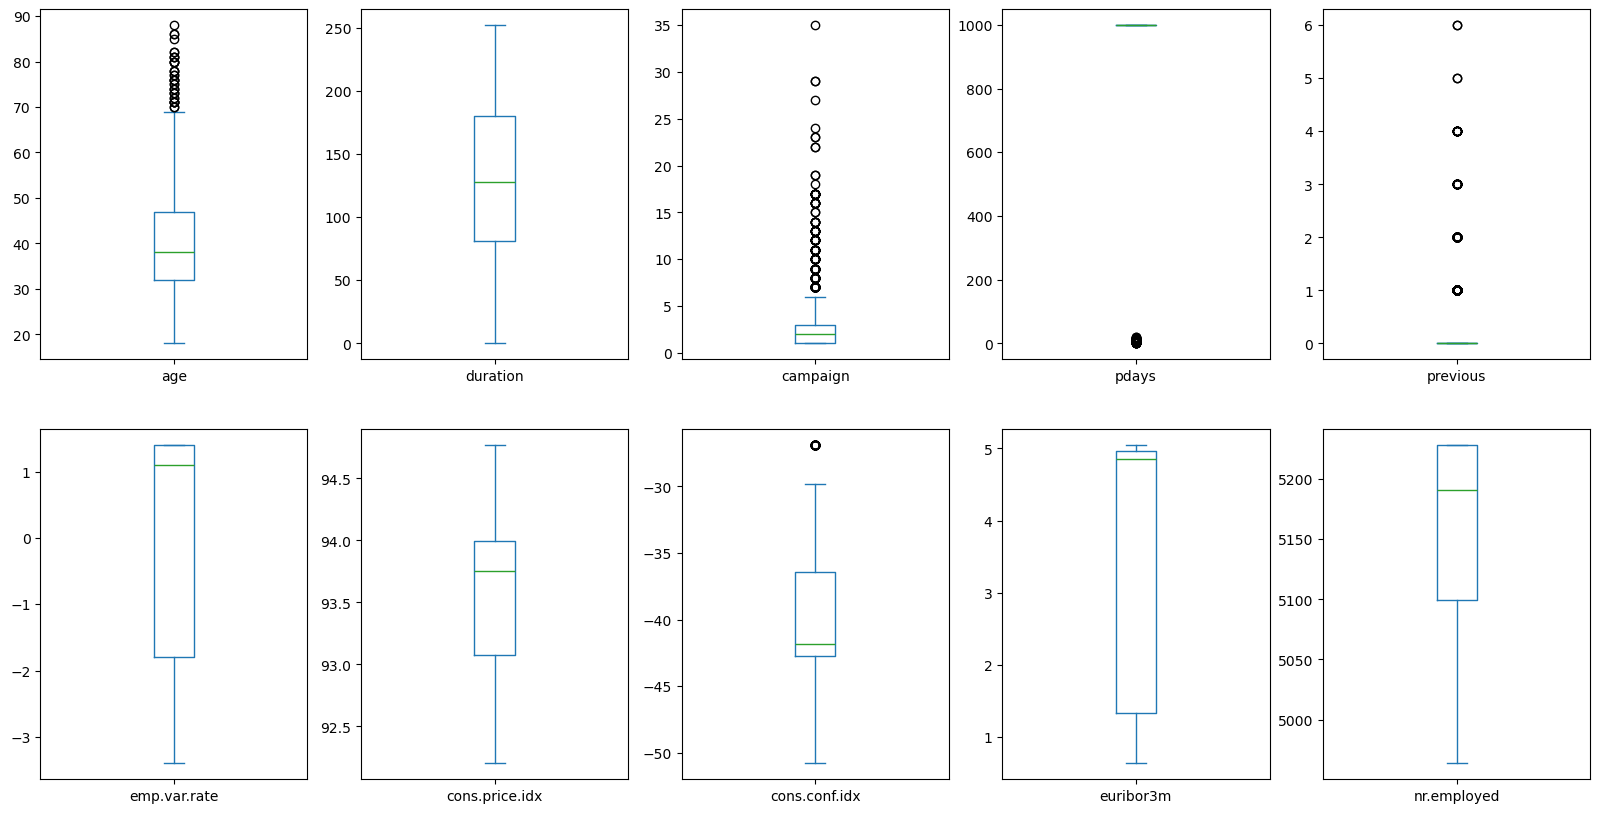

In [23]:
# Outlier removal using IQR for selected columns
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 -1.5 * iqr
upper_bound = q3 + 1.5* iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]
df.plot(kind='box', subplots=True, layout=(2,5), figsize=(20,10))
plt.show()

In [36]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']
df1 = df.copy()
df1.columns
df1.drop(high_corr_cols, inplace=True, axis=1)
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'y'],
      dtype='object')

In [38]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,y
0,0,8,2,7,0,0,0,0,9,2,250,0,3,1,2,1,24,1
1,0,8,2,7,0,2,0,0,6,2,180,0,7,2,2,16,12,0
2,0,8,2,7,0,2,2,1,1,4,250,0,20,0,1,19,14,0
3,1,8,2,3,1,2,0,0,6,3,250,3,20,0,1,8,4,0
4,2,1,2,3,0,2,0,0,6,4,250,0,20,0,1,8,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,63,3,1,0,0,0,0,1,9,3,250,2,3,2,2,21,15,1
4115,64,3,0,0,1,2,0,1,8,0,178,1,20,0,1,2,25,0
4116,65,5,1,7,1,2,0,0,9,3,250,0,20,0,1,21,15,1
4117,65,5,1,7,1,2,2,0,9,3,208,0,7,4,2,21,15,1


In [40]:
df_encoded['y'].value_counts()
x = df_encoded.drop('y', axis= 1)
z =df_encoded['y']
print(x.shape)
print(z.shape)
print (type(x)) 
print (type(z))

(4119, 17)
(4119,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [42]:
# split the data 
from sklearn.model_selection import train_test_split
x_train, x_test, z_train, z_test = train_test_split(x,z,test_size=0.25, random_state=1)

In [44]:
# cheack the accuracy_score, confusion_matrix,
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def eval_model(true, pred): 
    print("Accuracy:", accuracy_score(true, pred))
    print("Confusion Matrix:\n", confusion_matrix(true, pred))
    print("Classification Report:\n", classification_report(true, pred))

def mscore(model):
    print("Train Score:", model.score(x_train, z_train))
    print("Test Score:", model.score(x_test, z_test))

In [46]:
# train the model
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier(criterion ='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train, z_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [58]:
y_pred = dt.predict(x_test)

# Evaluation
eval_model(z_test,y_pred)

Accuracy: 0.9
Confusion Matrix:
 [[903  15]
 [ 88  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       918
           1       0.62      0.21      0.32       112

    accuracy                           0.90      1030
   macro avg       0.76      0.60      0.63      1030
weighted avg       0.88      0.90      0.88      1030



Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


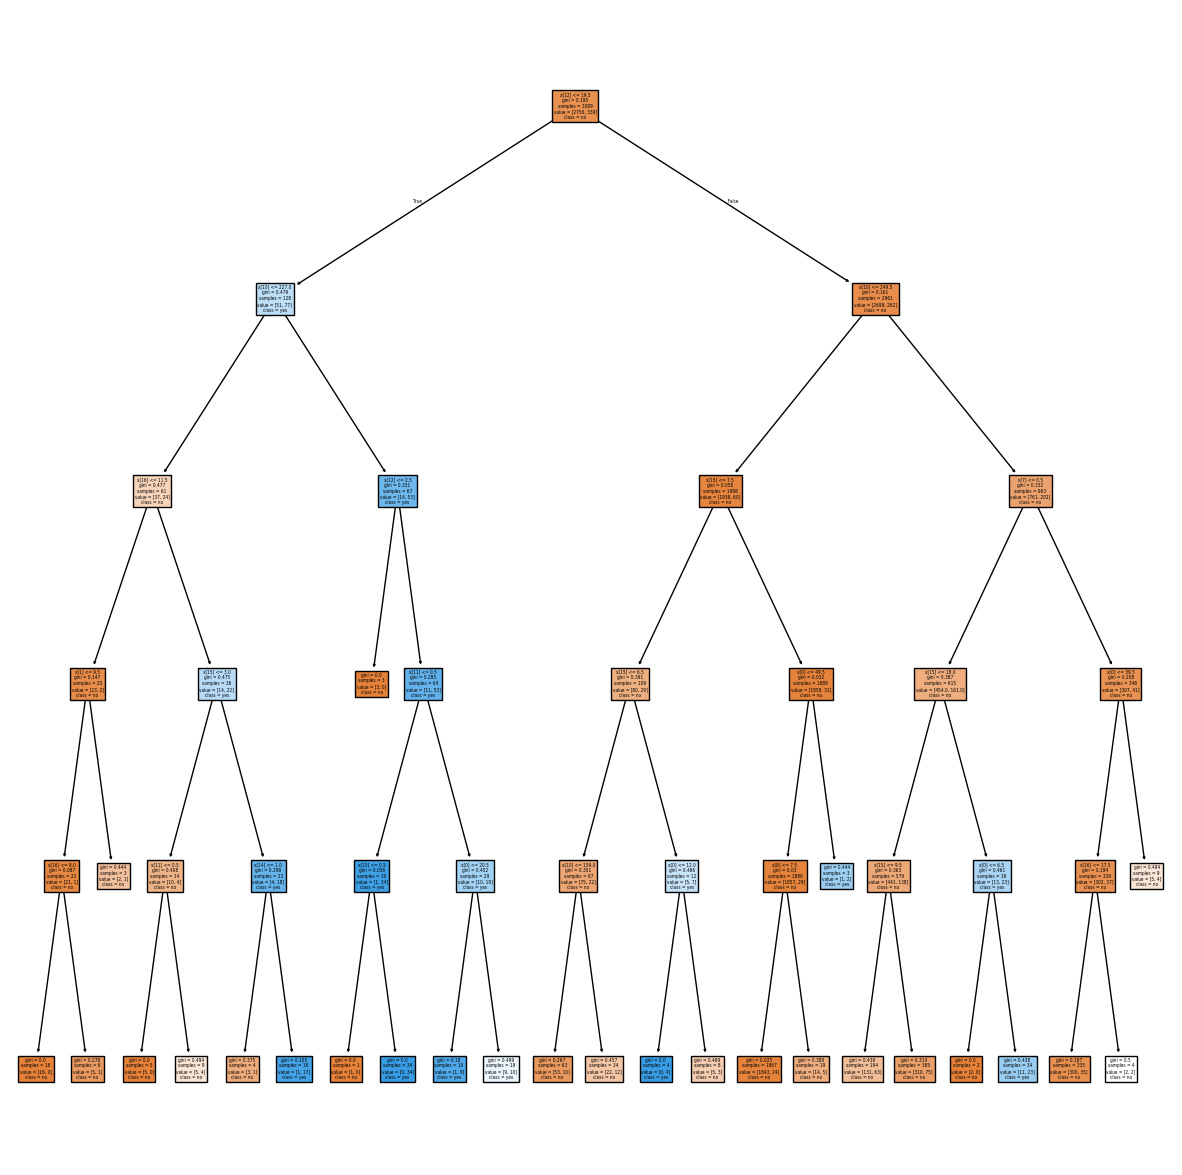

In [66]:
# plot the decesion tree
from sklearn.tree import plot_tree
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)

plt.figure(figsize=(15,15))
plot_tree(dt,class_names=cn,filled=True)
plt.show()